In [1]:
!pip install missingno

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
import plotly
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head().T

0  \
Unnamed: 0                                                   0   
ID                                                      158023   
Name                                                  L. Messi   
Age                                                         31   
Photo           https://cdn.sofifa.org/players/4/19/158023.png   
...                                                        ...   
GKHandling                                                11.0   
GKKicking                                                 15.0   
GKPositioning                                             14.0   
GKReflexes                                                 8.0   
Release Clause                                         €226.5M   

                                                            1  \
Unnamed: 0                                                  1   
ID                                                      20801   
Name                                        Cristiano Ronaldo   
Age                                                        33   
Photo           https://cdn.sofifa.org/players/4/19/20801.png   
...                                                       ...   
GKHandling                                               11.0   
GKKicking                                                15.0   
GKPositioning                                            14.0   
GKReflexes                                               11.0   
Release Clause                                        €127.1M   

                                                             2  \
Unnamed: 0                                                   2   
ID                                                      190871   
Name                                                 Neymar Jr   
Age                                                         26   
Photo           https://cdn.sofifa.org/players/4/19/190871.png   
...                                                        ...   
GKHandling                                                 9.0   
GKKicking                                                 15.0   
GKPositioning                                             15.0   
GKReflexes                                                11.0   
Release Clause                                         €228.1M   

                                                             3  \
Unnamed: 0                                                   3   
ID                                                      193080   
Name                                                    De Gea   
Age                                                         27   
Photo           https://cdn.sofifa.org/players/4/19/193080.png   
...                                                        ...   
GKHandling                                                85.0   
GKKicking                                                 87.0   
GKPositioning                                             88.0   
GKReflexes                                                94.0   
Release Clause                                         €138.6M   

                                                             4  
Unnamed: 0                                                   4  
ID                                                      192985  
Name                                              K. De Bruyne  
Age                                                         27  
Photo           https://cdn.sofifa.org/players/4/19/192985.png  
...                                                        ...  
GKHandling                                                13.0  
GKKicking                                                  5.0  
GKPositioning                                             10.0  
GKReflexes                                                13.0  
Release Clause                                         €196.4M  

[89 rows x 5 columns]

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [7]:
df.describe().T

count           mean           std    min  \
Unnamed: 0                18207.0    9103.000000   5256.052511    0.0   
ID                        18207.0  214298.338606  29965.244204   16.0   
Age                       18207.0      25.122206      4.669943   16.0   
Overall                   18207.0      66.238699      6.908930   46.0   
Potential                 18207.0      71.307299      6.136496   48.0   
Special                   18207.0    1597.809908    272.586016  731.0   
International Reputation  18159.0       1.113222      0.394031    1.0   
Weak Foot                 18159.0       2.947299      0.660456    1.0   
Skill Moves               18159.0       2.361308      0.756164    1.0   
Jersey Number             18147.0      19.546096     15.947765    1.0   
Crossing                  18159.0      49.734181     18.364524    5.0   
Finishing                 18159.0      45.550911     19.525820    2.0   
HeadingAccuracy           18159.0      52.298144     17.379909    4.0   
ShortPassing              18159.0      58.686712     14.699495    7.0   
Volleys                   18159.0      42.909026     17.694408    4.0   
Dribbling                 18159.0      55.371001     18.910371    4.0   
Curve                     18159.0      47.170824     18.395264    6.0   
FKAccuracy                18159.0      42.863153     17.478763    3.0   
LongPassing               18159.0      52.711933     15.327870    9.0   
BallControl               18159.0      58.369459     16.686595    5.0   
Acceleration              18159.0      64.614076     14.927780   12.0   
SprintSpeed               18159.0      64.726967     14.649953   12.0   
Agility                   18159.0      63.503607     14.766049   14.0   
Reactions                 18159.0      61.836610      9.010464   21.0   
Balance                   18159.0      63.966573     14.136166   16.0   
ShotPower                 18159.0      55.460047     17.237958    2.0   
Jumping                   18159.0      65.089432     11.820044   15.0   
Stamina                   18159.0      63.219946     15.894741   12.0   
Strength                  18159.0      65.311967     12.557000   17.0   
LongShots                 18159.0      47.109973     19.260524    3.0   
Aggression                18159.0      55.868991     17.367967   11.0   
Interceptions             18159.0      46.698276     20.696909    3.0   
Positioning               18159.0      49.958478     19.529036    2.0   
Vision                    18159.0      53.400903     14.146881   10.0   
Penalties                 18159.0      48.548598     15.704053    5.0   
Composure                 18159.0      58.648274     11.436133    3.0   
Marking                   18159.0      47.281623     19.904397    3.0   
StandingTackle            18159.0      47.697836     21.664004    2.0   
SlidingTackle             18159.0      45.661435     21.289135    3.0   
GKDiving                  18159.0      16.616223     17.695349    1.0   
GKHandling                18159.0      16.391596     16.906900    1.0   
GKKicking                 18159.0      16.232061     16.502864    1.0   
GKPositioning             18159.0      16.388898     17.034669    1.0   
GKReflexes                18159.0      16.710887     17.955119    1.0   

                               25%       50%       75%       max  
Unnamed: 0                  4551.5    9103.0   13654.5   18206.0  
ID                        200315.5  221759.0  236529.5  246620.0  
Age                           21.0      25.0      28.0      45.0  
Overall                       62.0      66.0      71.0      94.0  
Potential                     67.0      71.0      75.0      95.0  
Special                     1457.0    1635.0    1787.0    2346.0  
International Reputation       1.0       1.0       1.0       5.0  
Weak Foot                      3.0       3.0       3.0       5.0  
Skill Moves                    2.0       2.0       3.0       5.0  
Jersey Number                  8.0      17.0      26.0      99.0  
Cross

<a id="2"></a> 
# 2. Data Cleaning

In [8]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'], axis = 1, inplace = True)

<AxesSubplot:>

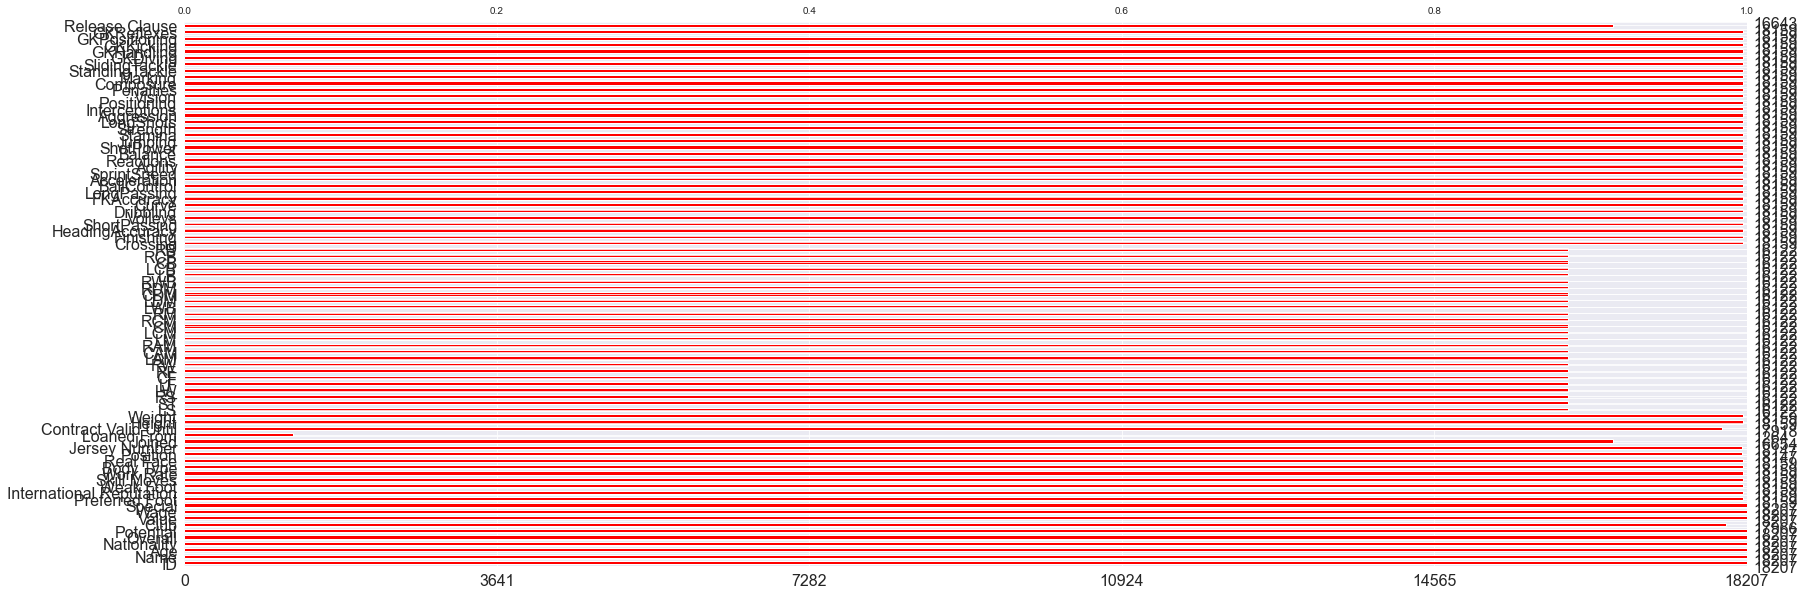

In [9]:
msno.bar(df.sample(18207), (28,10), color = 'red')

In [10]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 85, dtype: int64

`48` is repeating many times lets check if all of them are same `ID` or not

In [11]:
missing_height = df[df['Height'].isnull()].index.tolist()
missing_weight = df[df['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are same')
else:
    print('They are different')

They are same


As they are same I am assuming it will be same for other all columns too. 

We will see it soon. 

In [12]:
df.drop(df.index[missing_height], inplace = True)

In [13]:
df.isnull().sum()

ID                   0
Name                 0
Age                  0
Nationality          0
Overall              0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 85, dtype: int64

As we can see, we guessed right and now we have fewer null values.

In [14]:
df.drop(['Loaned From','Release Clause','Joined'], axis = 1, inplace = True)

<a id="3"></a>
# 3. Data Analysis

In [15]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)
print("\nEuropean Countries have most players")

Total number of countries : 164
England      1657
Germany      1195
Spain        1071
Argentina     936
France        911
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------

European Countries have most players


In [16]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
Name: Club, dtype: int64


In [17]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : ' + str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : ' + str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [18]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

BEST IN DIFFERENT ASPECTS :
Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [19]:
#Cleaning some of values so that we can interpret them 
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [20]:
df.head().T

0                  1          2       3             4
ID                158023              20801     190871  193080        192985
Name            L. Messi  Cristiano Ronaldo  Neymar Jr  De Gea  K. De Bruyne
Age                   31                 33         26      27            27
Nationality    Argentina           Portugal     Brazil   Spain       Belgium
Overall               94                 94         92      91            91
...                  ...                ...        ...     ...           ...
GKDiving             6.0                7.0        9.0    90.0          15.0
GKHandling          11.0               11.0        9.0    85.0          13.0
GKKicking           15.0               15.0       15.0    87.0           5.0
GKPositioning       14.0               14.0       15.0    88.0          10.0
GKReflexes           8.0               11.0       11.0    94.0          13.0

[82 rows x 5 columns]

In [21]:
#Top earners
print('Most valued player : ' + str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : ' + str(df.loc[df['Wage'].idxmax()][1]))
print("--"*40)
print("\nTop Earners")

Most valued player : Neymar Jr
Highest earner : L. Messi
--------------------------------------------------------------------------------

Top Earners


<a id="4"></a> <br>
# 4. Exploratory Data Analysis

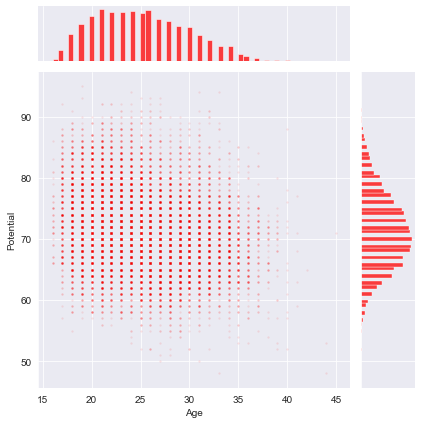

In [22]:
sns.jointplot(x = df['Age'], y = df['Potential'],
              joint_kws = {
                  'alpha':0.1,
                  's':5,
                  'color':'red'
              },
              marginal_kws = {'color':'red'})

`Potential` tends to fall as you grow old

Source of below visualisations: [fifa19-analysis](https://www.kaggle.com/dczerniawko/fifa19-analysis)

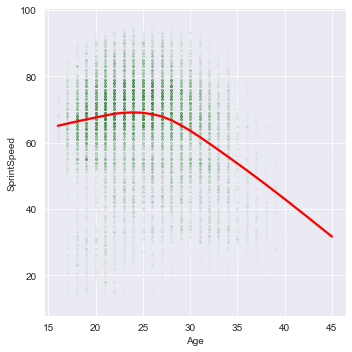

In [23]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed', lowess = True, scatter_kws = {'alpha':0.01, 's':5,'color':'green'}, 
           line_kws = {'color':'red'})

As the `age` increases the `sprint speed` decreases

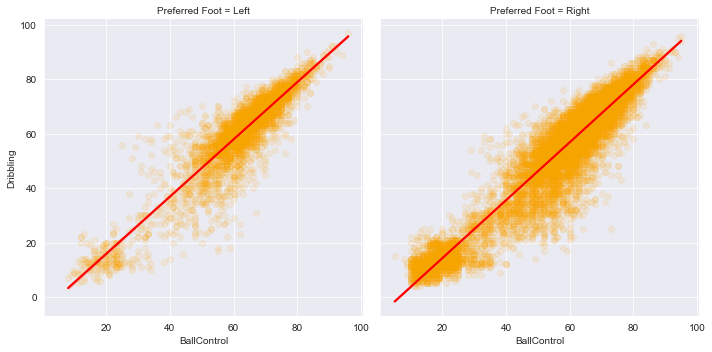

In [24]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df, col = 'Preferred Foot', scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws = {'color':'red'})

`Left Footed Players` vs `Right Footed Players`

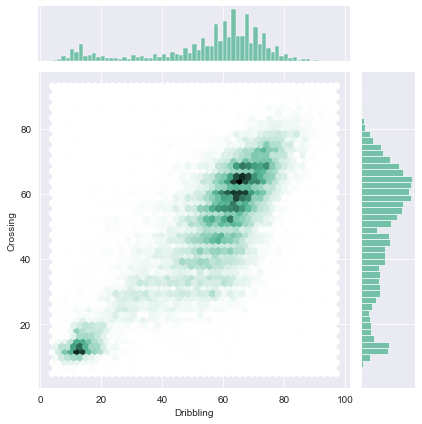

In [25]:
sns.jointplot(x = df['Dribbling'], y = df['Crossing'], kind = "hex", color = "#4CB391");

`Crossing` vs `Dribbling`

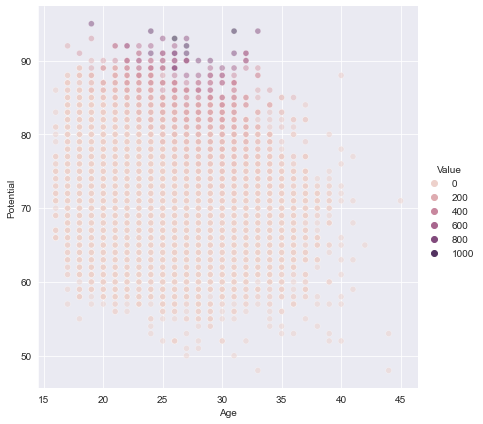

In [26]:
value = df.Value
cmap = sns.cubehelix_palette(rot =- .2, as_cmap = True)

sns.relplot(x = "Age", y = "Potential", hue = value/100000, 
            sizes = (40, 400), alpha = .5,
            height = 6, data = df);

Relation between `potential` and `age` with respected `value` of players

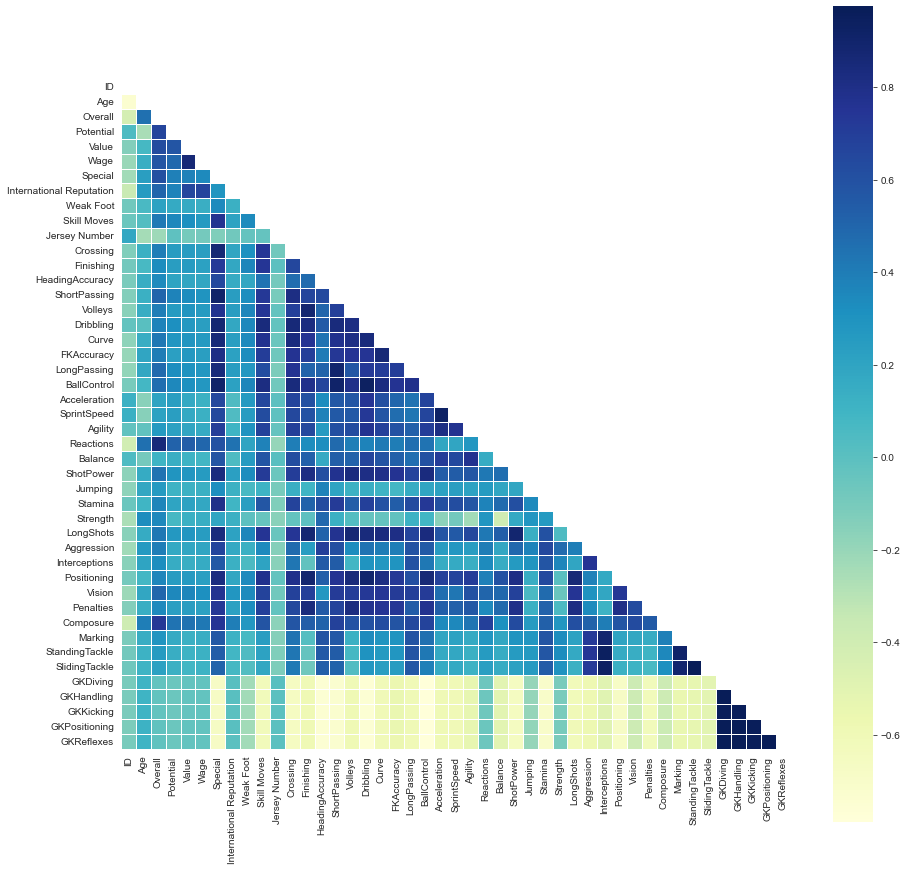

In [27]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (15, 15))
    ax = sns.heatmap(corr, mask = mask, square = True, linewidths = .8, cmap = "YlGnBu")

**Lowest correlation** among the goalkeeping side with other columns and high among themselves 

**High correlation** between `Dribbling`, `Volleys`, `Passing` etc...

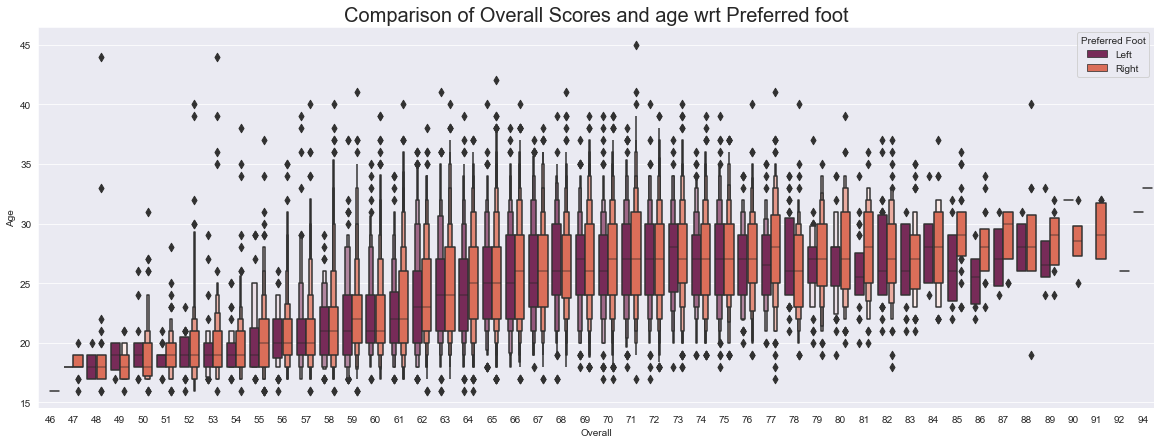

In [28]:
plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxenplot(df['Overall'], df['Age'], hue = df['Preferred Foot'], palette = 'rocket')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

We will have comparisions for `Age`, `Overall`, `Potential`, `Accelaration`, `SprintSpeed`, `Agility` , `Stamina`, `Strength`

In [29]:
cols = ['Age','Overall','Potential','Acceleration','SprintSpeed',"Agility","Stamina",'Strength','Preferred Foot']
df_small = df[cols]

In [30]:
df_small.head()

Age  Overall  Potential  Acceleration  SprintSpeed  Agility  Stamina  \
0   31       94         94          91.0         86.0     91.0     72.0   
1   33       94         94          89.0         91.0     87.0     88.0   
2   26       92         93          94.0         90.0     96.0     81.0   
3   27       91         93          57.0         58.0     60.0     43.0   
4   27       91         92          78.0         76.0     79.0     90.0   

   Strength Preferred Foot  
0      59.0           Left  
1      79.0          Right  
2      49.0          Right  
3      64.0          Right  
4      75.0          Right

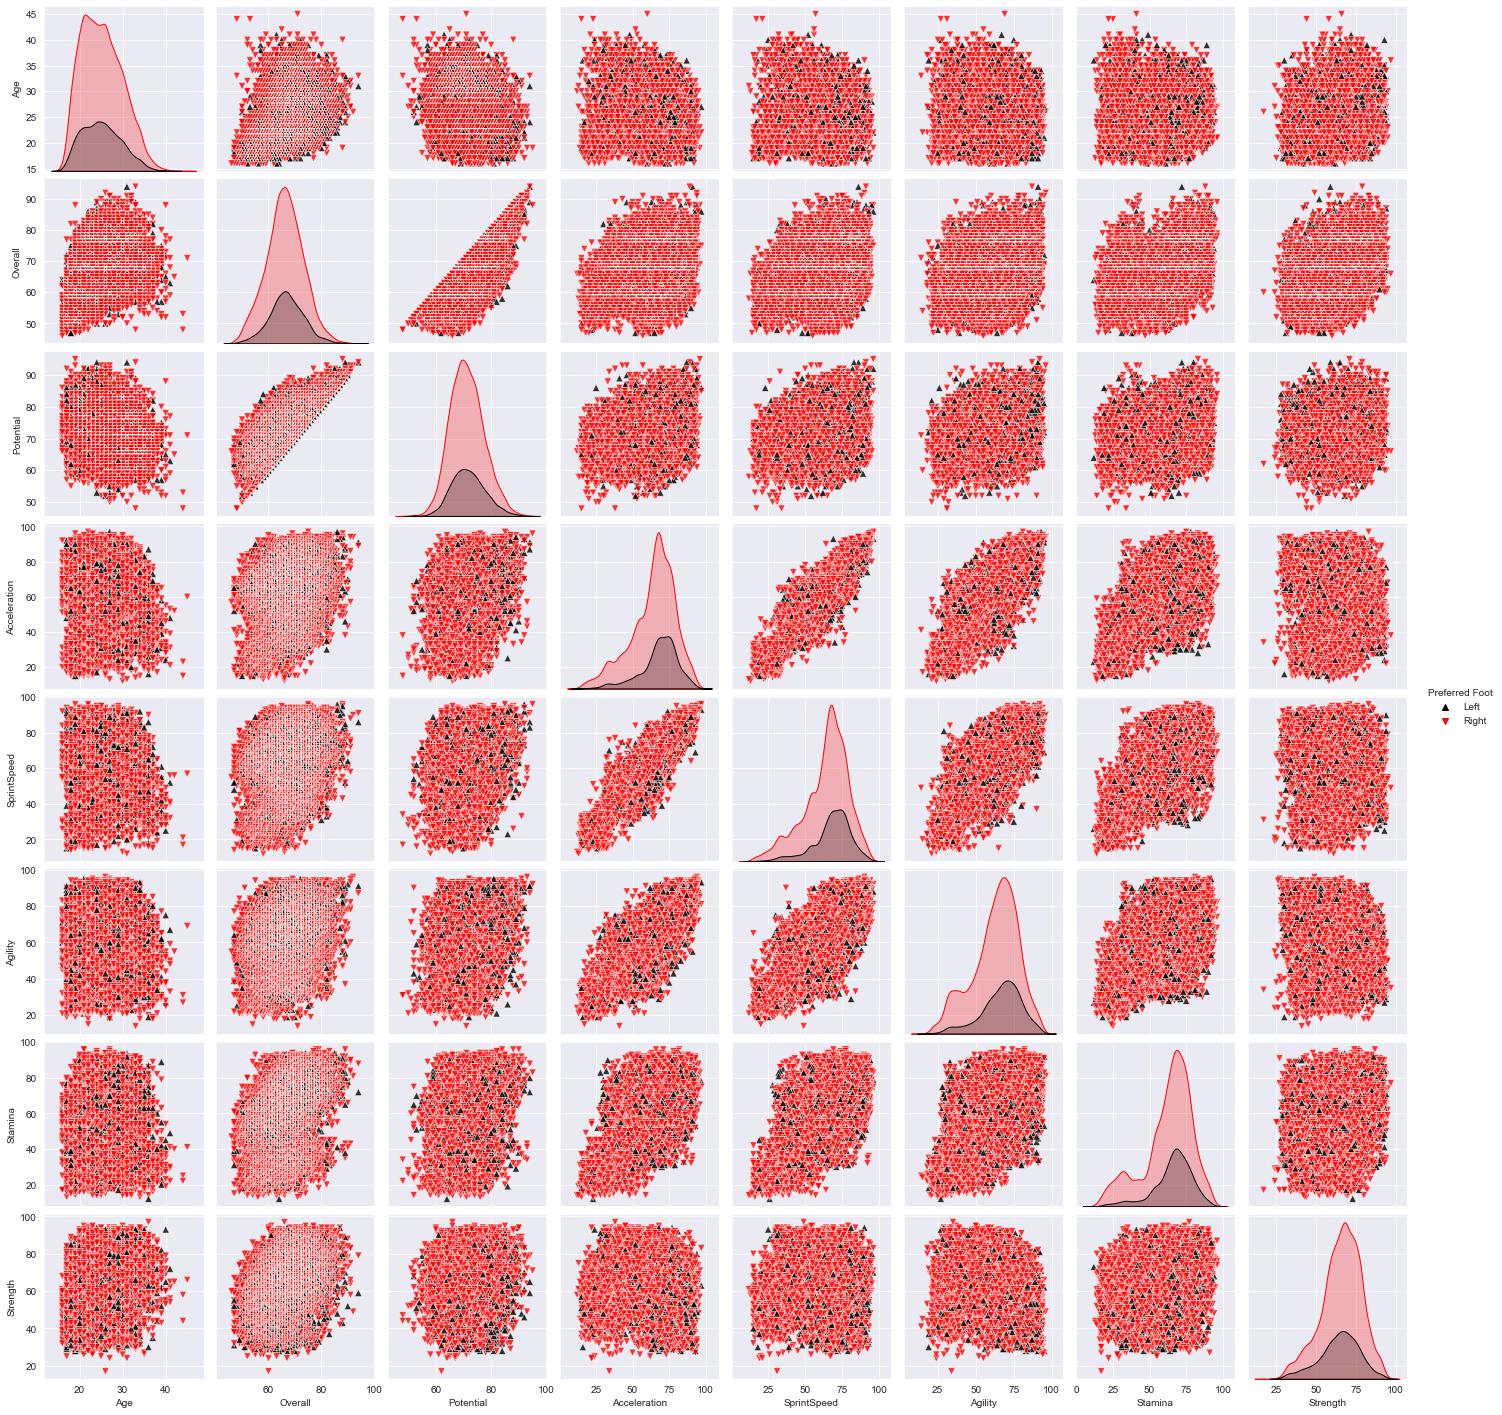

In [31]:
sns.pairplot(df_small, hue ='Preferred Foot', palette = ["black", "red"], plot_kws = dict(s = 50, alpha = 0.8), markers = ['^','v'])

<a id="5"></a> <br>
# 5.Modelling

In [32]:
df = pd.read_csv('data.csv')

In [33]:
#DROP UNNECESSARY VALUES
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
df = df.dropna()
df.head()

Age Nationality  Overall  Potential Preferred Foot  \
0   31   Argentina       94         94           Left   
1   33    Portugal       94         94          Right   
2   26      Brazil       92         93          Right   
3   27       Spain       91         93          Right   
4   27     Belgium       91         92          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate Real Face  \
0                       5.0        4.0          4.0  Medium/ Medium       Yes   
1                       5.0        4.0          5.0       High/ Low       Yes   
2                       5.0        5.0          5.0    High/ Medium       Yes   
3                       4.0        3.0          1.0  Medium/ Medium       Yes   
4                       4.0        5.0          4.0      High/ High       Yes   

   ... Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
0  ...      75.0       96.0     33.0            28.0           26.0       6.0   
1  ...      85.0       95.0     28.0            31.0           23.0       7.0   
2  ...      81.0       94.0     27.0            24.0           33.0       9.0   
3  ...      40.0       68.0     15.0            21.0           13.0      90.0   
4  ...      79.0       88.0     68.0            58.0           51.0      15.0   

   GKHandling  GKKicking  GKPositioning  GKReflexes  
0        11.0       15.0           14.0         8.0  
1        11.0       15.0           14.0        11.0  
2         9.0       15.0           15.0        11.0  
3        85.0       87.0           88.0        94.0  
4        13.0        5.0           10.0        13.0  

[5 rows x 45 columns]

In [34]:
#Turn Real Face into a binary indicator variable
def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"] = tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"] = tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()


Age  Overall  Potential  International Reputation  Weak Foot  Skill Moves  \
0   31       94         94                       5.0        4.0          4.0   
1   33       94         94                       5.0        4.0          5.0   
2   26       92         93                       5.0        5.0          5.0   
3   27       91         93                       4.0        3.0          1.0   
4   27       91         92                       4.0        5.0          4.0   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  ...  GKHandling  \
0      84.0       95.0             70.0          90.0  ...        11.0   
1      84.0       94.0             89.0          81.0  ...        11.0   
2      79.0       87.0             62.0          84.0  ...         9.0   
3      17.0       13.0             21.0          50.0  ...        85.0   
4      93.0       82.0             55.0          92.0  ...        13.0   

   GKKicking  GKPositioning  GKReflexes  Real_Face  Right_Foot  \
0       15.0           14.0         8.0          1           0   
1       15.0           14.0        11.0          1           1   
2       15.0           15.0        11.0          1           1   
3       87.0           88.0        94.0          1           1   
4        5.0           10.0        13.0          1           1   

   Simple_Position  Major_Nation  WorkRate1  WorkRate2  
0               ST             1     Medium     Medium  
1               ST             1       High        Low  
2               AM             1       High     Medium  
3               GK             1     Medium     Medium  
4               MF             1       High       High  

[5 rows x 46 columns]

In [35]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(Y_test.shape,Y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [36]:
%%time
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: ' + str(r2_score(Y_test, predictions)))
print('RMSE : ' + str(np.sqrt(mean_squared_error(Y_test, predictions))))

r2 score: 0.932581067471271
RMSE : 1.8255313042933603
Wall time: 48 ms


Permutation importance is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy.

In [37]:
perm = PermutationImportance(model, random_state=1).fit(X_test, Y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

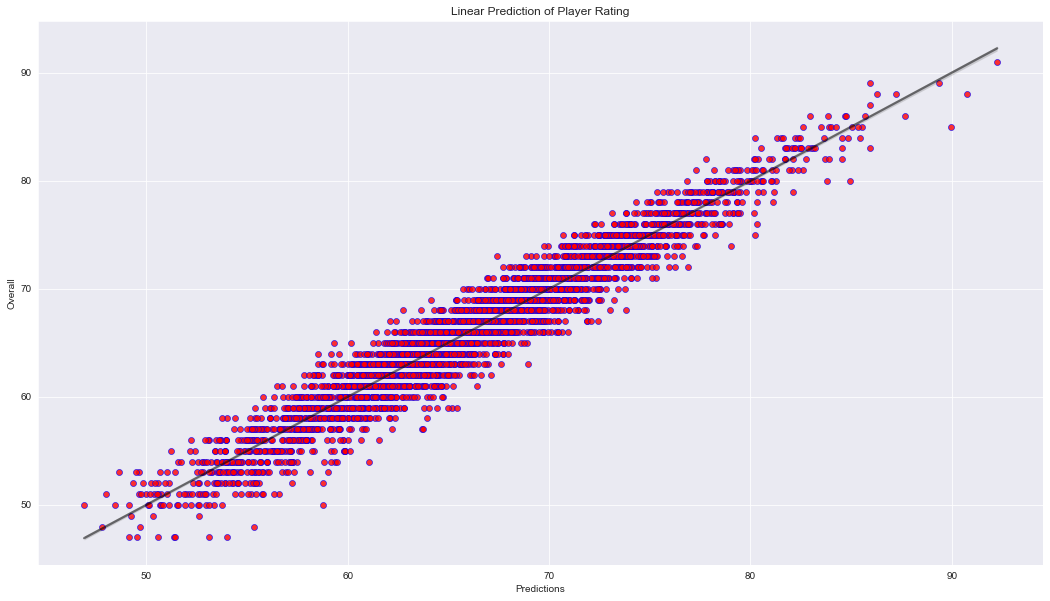

In [39]:
#Visualising the results
plt.figure(figsize = (18, 10))
sns.regplot(predictions, Y_test, scatter_kws = {'color':'red','edgecolor':'blue','linewidth':0.7}, line_kws = {'color':'black','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()